In [40]:
# Pyplot importieren
import matplotlib.pyplot as plt

# Seaborn importieren
import seaborn as sns

# sklearn libraries importieren
from sklearn import linear_model, tree

# Numpy importieren
import numpy as np

# Pandas importieren
import pandas as pd
# Imports Modelle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import plot_tree

In [3]:
data_train = pd.read_csv('bodyPerformance.csv')

In [5]:
data_train.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [24]:
duplikate = data_train.duplicated()

anzahl_duplikate = duplikate.sum()

doppelte_zeilen = data_train[duplikate]

print(f"Anzahl der doppelten Zeilen: {anzahl_duplikate}")
print("Doppelte Zeilen:")
print(doppelte_zeilen)

Anzahl der doppelten Zeilen: 1
Doppelte Zeilen:
        age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
12473  27.0       2      157.0       49.1        30.7       70.0      86.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  \
12473       27.7                     19.7            51.0          167.0   

       class  
12473      1  


In [19]:
class_replace = {
    'A':1,
    'B':2,
    'C':3,
    'D':4
}
gender_replace = {
    'M':1,
    'F':2
}
data_train['class'] = data_train['class'].replace(class_replace)
data_train['gender'] = data_train['gender'].replace(gender_replace)

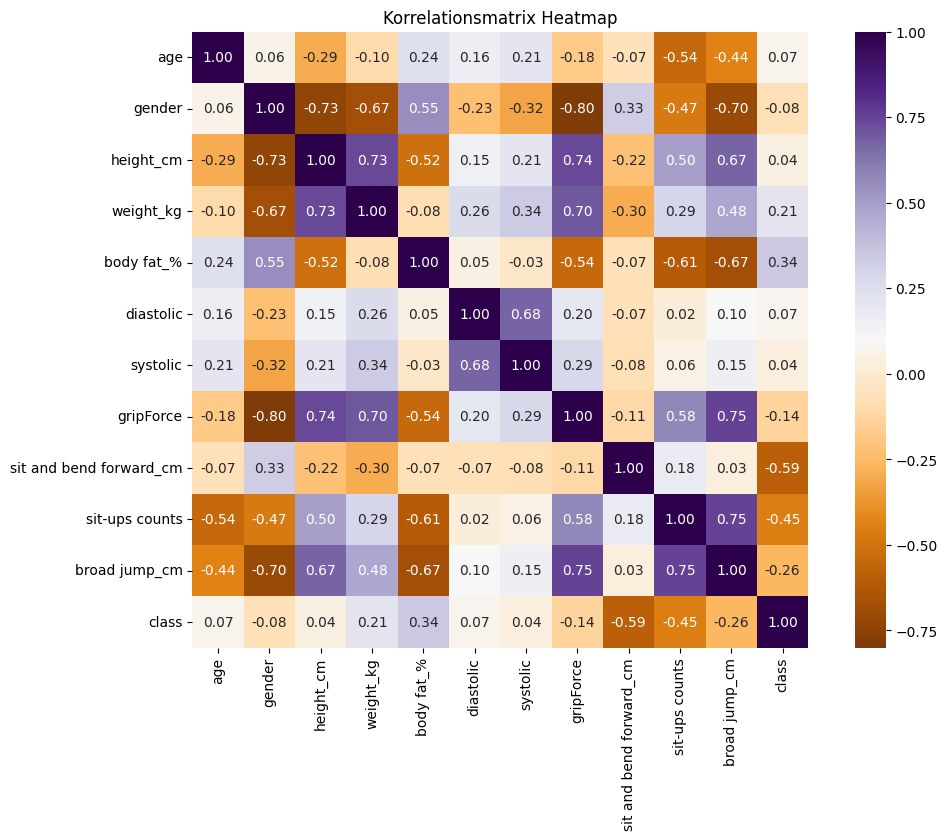

In [22]:
ausgewaehlte_variablen = ['age','gender','height_cm','weight_kg','body fat_%','diastolic','systolic',
                          'gripForce','sit and bend forward_cm','sit-ups counts','broad jump_cm','class']

korrelationsmatrix = data_train[ausgewaehlte_variablen].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(korrelationsmatrix, annot=True, fmt=".2f", cmap='PuOr', square=True, cbar=True)

plt.title('Korrelationsmatrix Heatmap')
plt.show()

<Axes: xlabel='height_cm', ylabel='weight_kg'>

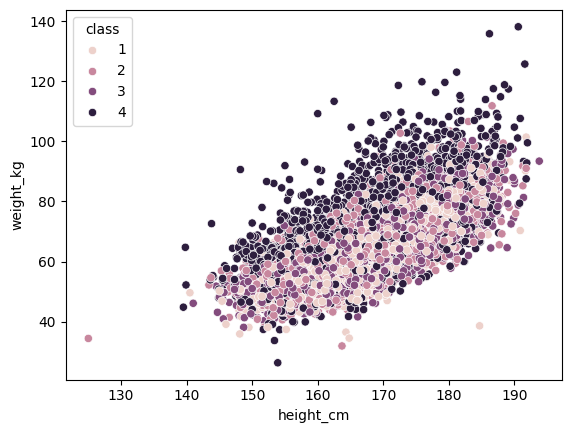

In [25]:
sns.scatterplot(data=data_train, x="height_cm", y="weight_kg", hue="class")

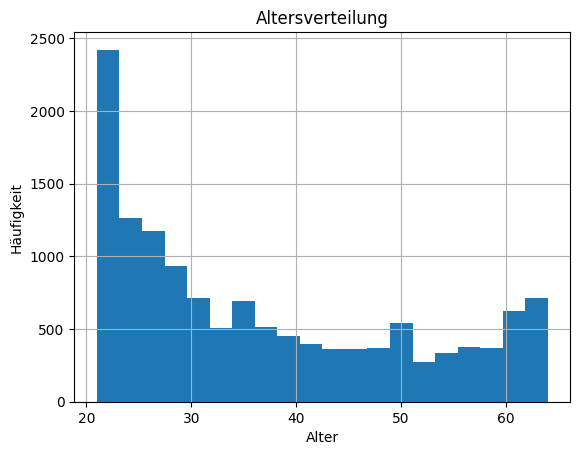

In [7]:
data_train['age'].hist(bins=20)
plt.title('Altersverteilung')
plt.xlabel('Alter')
plt.ylabel('Häufigkeit')
plt.show()

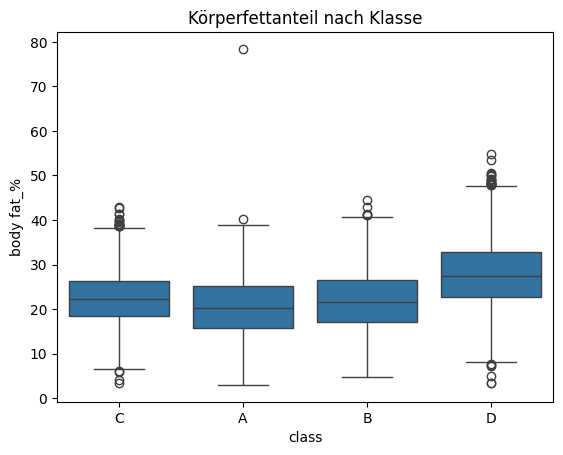

In [9]:
sns.boxplot(x='class', y='body fat_%', data=data_train)
plt.title('Körperfettanteil nach Klasse')
plt.show()

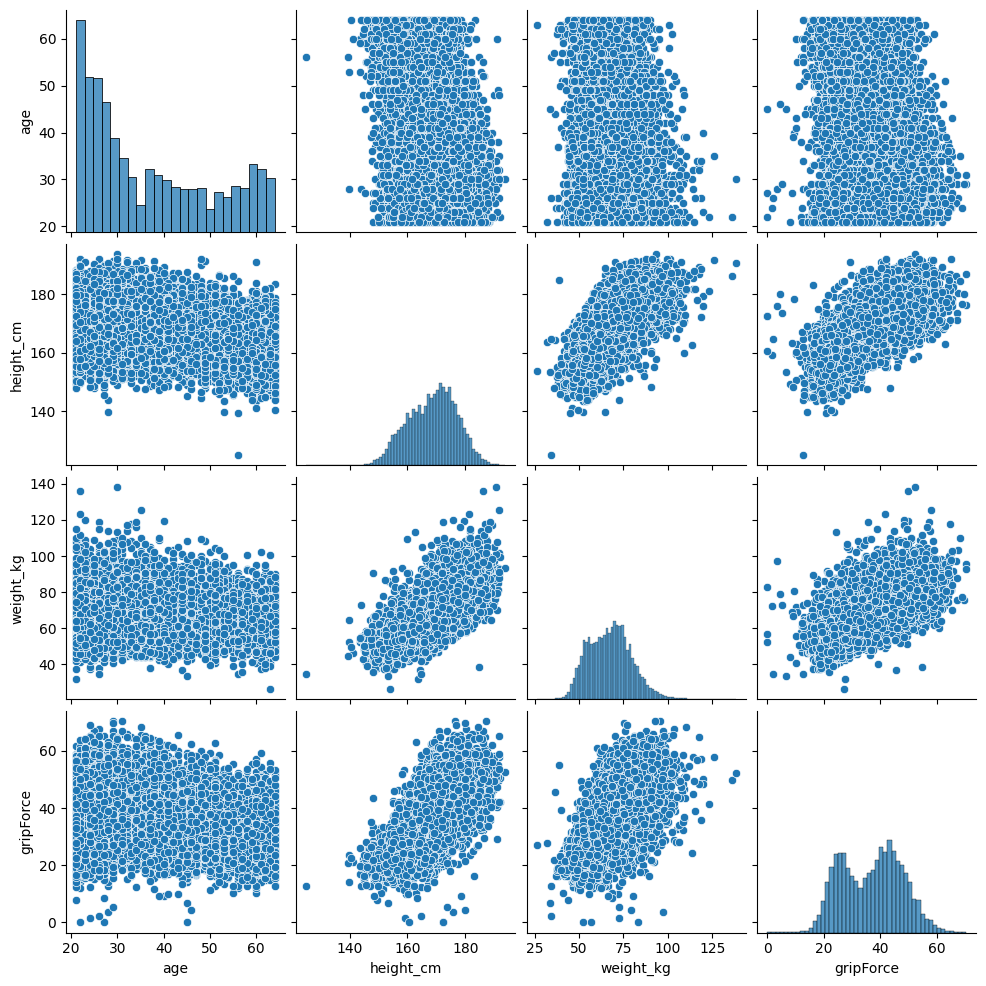

In [10]:
sns.pairplot(data_train[['age', 'height_cm', 'weight_kg', 'gripForce']])
plt.show()

<ipython-input-14-f21c5320f278>:13: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.kdeplot(data=data_train_filtered, x='sit and bend forward_cm', hue='class', fill=True, common_norm=False,


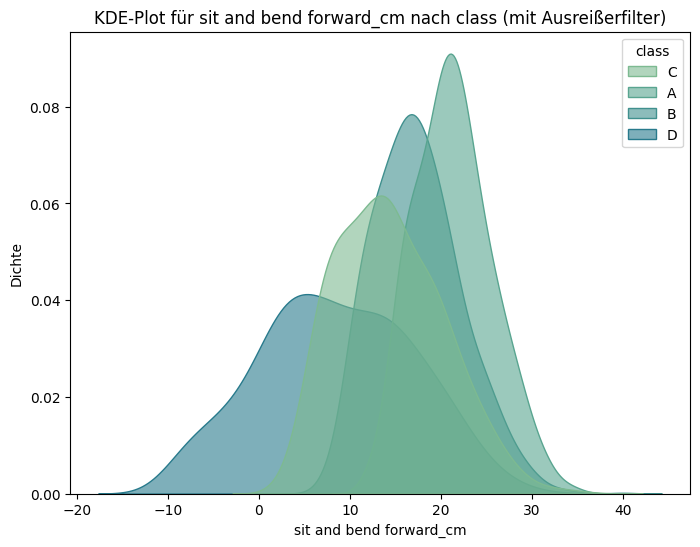

In [14]:
from scipy import stats
data_train_filtered = data_train[(np.abs(stats.zscore(data_train['sit and bend forward_cm'])) < 3)]

colors = sns.color_palette("crest", as_cmap=False)

plt.figure(figsize=(8, 6))
sns.kdeplot(data=data_train_filtered, x='sit and bend forward_cm', hue='class', fill=True, common_norm=False,
            alpha=0.6, bw_adjust=1.5, palette=colors)

plt.title('KDE-Plot für sit and bend forward_cm nach class (mit Ausreißerfilter)')
plt.xlabel('sit and bend forward_cm')
plt.ylabel('Dichte')

plt.show()


### ***Modelle***

Modellgenauigkeit: 62.75%


<ipython-input-45-d3566bc27ece>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')


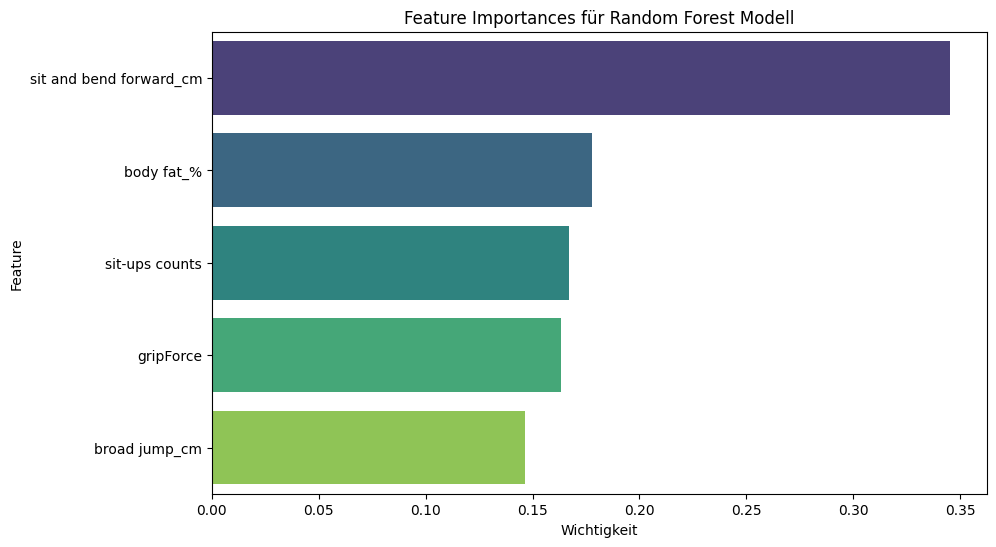

In [45]:
#Modell01 Versuch01

#Features
features = ['sit and bend forward_cm', 'sit-ups counts', 'gripForce', 'broad jump_cm', 'body fat_%']

X = data_train[features]
y = data_train['class']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Modell erstellen
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modell trainieren
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Modellgenauigkeit: {accuracy * 100:.2f}%")


importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Feature-Namen
feature_names = np.array(features)

# Plot der Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')
plt.title('Feature Importances für Random Forest Modell')
plt.xlabel('Wichtigkeit')
plt.ylabel('Feature')
plt.show()


In [31]:
#Modell01 Versuch02
from sklearn.ensemble import VotingClassifier

# Modelle initialisieren
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Voting-Klassifikator erstellen (hard voting)
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model), ('xgb', xgb_model), ('lgb', lgb_model)], voting='hard')

# Voting-Klassifikator trainieren
voting_clf.fit(X_train_scaled, y_train)

# Vorhersagen und Genauigkeit
y_pred_voting = voting_clf.predict(X_test_scaled)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Modellgenauigkeit mit VotingClassifier: {accuracy_voting * 100:.2f}%")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1738
[LightGBM] [Info] Number of data points in the train set: 10714, number of used features: 11
[LightGBM] [Info] Start training from score -1.392098
[LightGBM] [Info] Start training from score -1.383871
[LightGBM] [Info] Start training from score -1.378670
[LightGBM] [Info] Start training from score -1.390597
Modellgenauigkeit mit VotingClassifier: 77.19%


Modellgenauigkeit: 95.33%


<ipython-input-43-e89ac1b32456>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')


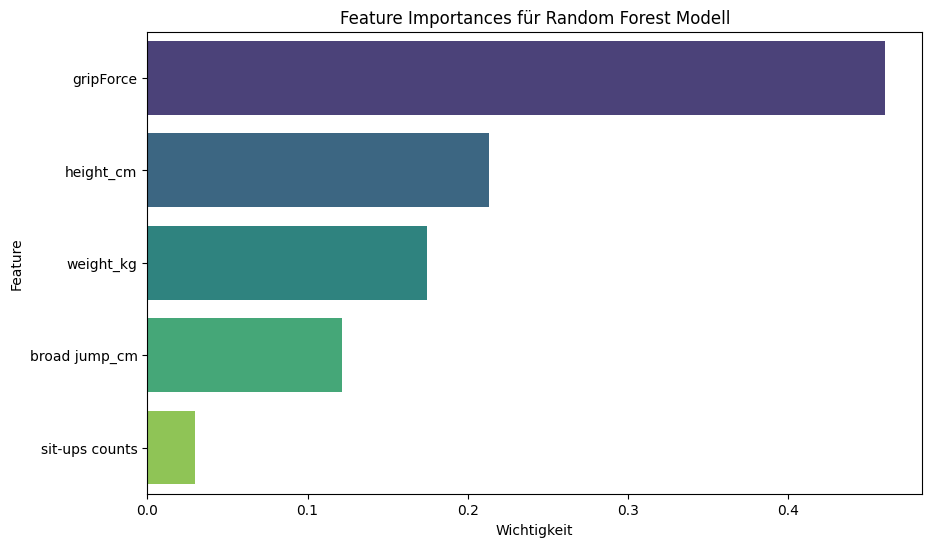

In [43]:
# Modell 02 Versuch01

#Features
features = ['height_cm', 'weight_kg', 'gripForce', 'broad jump_cm', 'sit-ups counts']

X = data_train[features]
y = data_train['gender']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Modell erstellen
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modell trainieren
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Modellgenauigkeit: {accuracy * 100:.2f}%")

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Feature-Namen
feature_names = np.array(features)

# Plot der Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')
plt.title('Feature Importances für Random Forest Modell')
plt.xlabel('Wichtigkeit')
plt.ylabel('Feature')
plt.show()



R^2-Score: 0.04


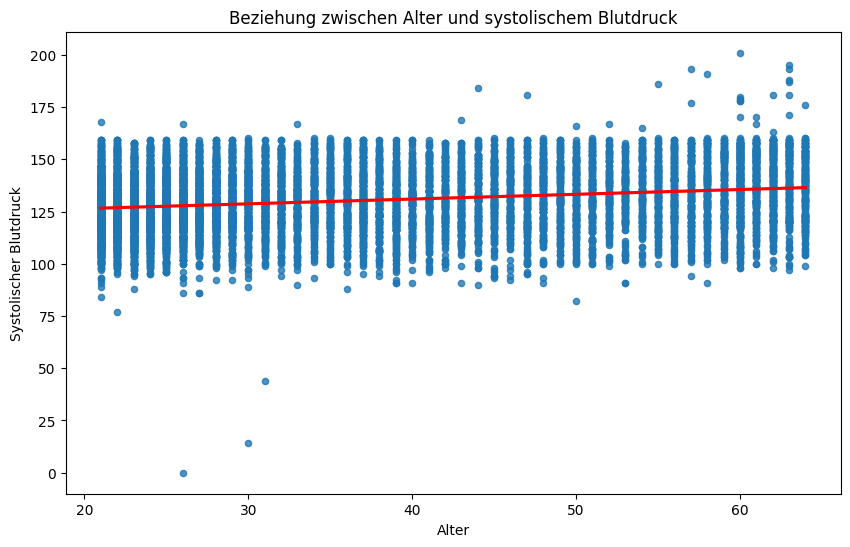

In [50]:
#Modell03 Versuch01
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = data_train[['age']]
y = data_train['systolic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R^2-Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='systolic', data=data_train, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.title('Beziehung zwischen Alter und systolischem Blutdruck')
plt.xlabel('Alter')
plt.ylabel('Systolischer Blutdruck')
plt.show()
